# Blatt 2

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from util1 import *
from util2 import *

## Aufgabe 1: Training

Zuerst werden Trainingsdatensätze mit jeweils 100 Datenpunkten pro Klasse und einer Verschiebung der negativen Werte um $\left(\begin{array}{c}0.9 \\ 0.9 \end{array}\right)$ . Es werden 10 Datensätze erzeugt und jeweils ein ein Perzeptron trainiert und zusammen mit den Daten in einer Liste abgelegt. Zuerst wird eine Schrittweite von $\eta = 0.1$ verwendet.  

In [2]:
data_perceptrons = []
for i in range(10):
    training_data = create_perceptron_input(n=100, neg_shift=np.array([0.9, 0.9]))
    data_perceptrons.append((training_data, perceptron_train(*training_data, eta_par=0.1)))
    data_perceptrons[-1][1]

Perceptron(terminated=True, weights_vec=array([-0.76163852, -0.65029731]), bias_par=array([1.32336578]), n_updates_train=28, iterations=3, R=2.572319754755864)

Perceptron(terminated=True, weights_vec=array([-0.89683955, -0.573272  ]), bias_par=array([1.37181331]), n_updates_train=28, iterations=2, R=2.6189819640315926)

Perceptron(terminated=True, weights_vec=array([-0.22128678, -0.500037  ]), bias_par=array([0.657037]), n_updates_train=11, iterations=1, R=2.563273306963921)

Perceptron(terminated=False, weights_vec=array([-1.85017103, -5.42634324]), bias_par=array([6.3173411]), n_updates_train=1651, iterations=499, R=2.6493900985599)

Perceptron(terminated=True, weights_vec=array([-0.35923925, -0.37497003]), bias_par=array([0.67465439]), n_updates_train=23, iterations=6, R=2.597410993229185)

Perceptron(terminated=True, weights_vec=array([-0.57406796, -0.70587966]), bias_par=array([1.23147529]), n_updates_train=26, iterations=2, R=2.481406147748856)

Perceptron(terminated=True, weights_vec=array([-0.3647989 , -0.38165553]), bias_par=array([0.71180647]), n_updates_train=13, iterations=1, R=2.66797014229947)

Perceptron(terminated=True, weights_vec=array([-0.96875255, -1.19558323]), bias_par=array([2.12230927]), n_updates_train=57, iterations=7, R=2.6597676999471114)

Perceptron(terminated=False, weights_vec=array([-1.26701561, -4.06176372]), bias_par=array([5.1475762]), n_updates_train=1696, iterations=499, R=2.536625761521903)

Perceptron(terminated=False, weights_vec=array([-0.49982931, -1.57642637]), bias_par=array([1.95328469]), n_updates_train=1103, iterations=499, R=2.5516561240167723)

Die ersten drei Trainingsdaten ,bei denen die PLR terminiert ist, mit den gelernten Trennebenen sehen wie folgt aus:

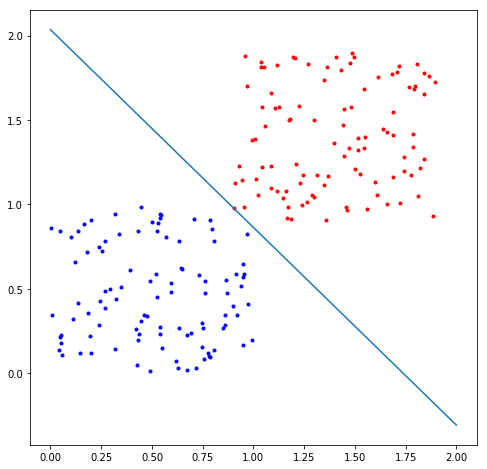

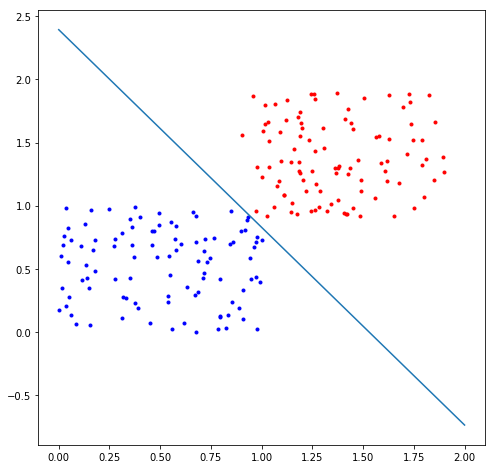

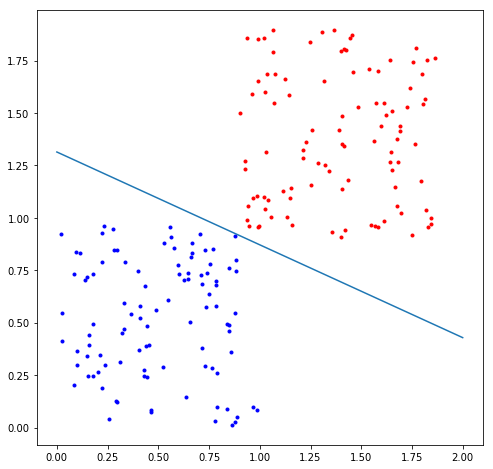

In [3]:
for train_data, perceptron in [dp for dp in data_perceptrons if dp[1].terminated][:3]:
    plot_perceptron(perceptron, *train_data)

Im folgenden werden wieder 10 Datensätze mit 100 Punkten pro Klasse und einer Verschiebung von $\left(\begin{array}{c}0.9 \\ 0.9 \end{array}\right)$ erzeugt. Es wird überprüft ob die Daten linear separable sind indem ein Überlappen der konvexen Hüllen festegestellt wird. Nicht separierbare Datensätze werden übersprungen.  
Für jeden separierbaren Datensatz wird ein Perzeptron trainiert und die tatsächliche und größtmögliche Anzahl an Parameteranpassungen ausgegeben.

In [4]:
for i in range(10):
    training_data = create_perceptron_input(n=100, neg_shift=np.array([0.9, 0.9]))
    # skip data that is not separable
    if do_conv_hulls_overlap(*split_labeled_data(*training_data)):
        continue
        
    perceptron = perceptron_train(*training_data, eta_par=1)
    error_bound = upper_error_bound(perceptron, training_data[0])
    print(f"Actual error count: {perceptron.n_updates_train} ; Upper bound: {error_bound}")

Actual error count: 26 ; Upper bound: [701215.32142397]
Actual error count: 32 ; Upper bound: [116145.07277291]
Actual error count: 11 ; Upper bound: [15653.89627783]
Actual error count: 13 ; Upper bound: [45666.54441512]
Actual error count: 1288 ; Upper bound: [2145558.91617244]
Actual error count: 28 ; Upper bound: [217478.14233135]
Actual error count: 149 ; Upper bound: [10169783.0800918]
Actual error count: 11 ; Upper bound: [78189.09222447]


## Aufgabe 2: Testen

Die Funktion `test_perceptron_performance()` generiert mehrere Datensätze mit den spezifizierten Klassengrößen für die Trainings und Testdaten. Die Trainingsdaten sind garantiert separierbar, die Testdaten nicht.  
Es werden die gesamte Anzahl an falschen Klassifikationen, die durschnittliche Anzahl an Fehlern pro Testset, die Standardabweichung sowie der minimale und maximale Fehler ausgegeben.

In [5]:
n_test = 50
perceptron_eval = test_perceptron_performance(n_train=50, n_test=n_test, n_datasets=100)
perceptron_eval
perceptron_eval.mean_err / n_test

PerceptronEval(error_count=112, mean_err=1.12, std_deviaton=1.343726162579266, min_err=0, max_err=10)

0.022400000000000003